In [1]:
from skimage.filters import gabor_kernel
from skimage import io
from skimage.transform import resize
from matplotlib import pyplot as plt 
import numpy as np

import math

0.3 0.2 0.0
(3, 3)
0.3 0.8 0.0
(3, 3)
0.3 0.6 0.0
(3, 3)
0.3 0.4 0.0
(3, 3)
0.45 0.2 0.0
(3, 3)
0.45 0.8 0.0
(3, 3)
0.45 0.6 0.0
(3, 3)
0.45 0.4 0.0
(3, 3)
0.6 0.2 0.0
(3, 3)
0.6 0.8 0.0
(3, 3)
0.6 0.6 0.0
(3, 3)
0.6 0.4 0.0
(3, 3)
0.3 0.2 0.196349375
(3, 3)
0.3 0.8 0.196349375
(3, 3)
0.3 0.6 0.196349375
(3, 3)
0.3 0.4 0.196349375
(3, 3)
0.45 0.2 0.196349375
(3, 3)
0.45 0.8 0.196349375
(3, 3)
0.45 0.6 0.196349375
(3, 3)
0.45 0.4 0.196349375
(3, 3)
0.6 0.2 0.196349375
(3, 3)
0.6 0.8 0.196349375
(3, 3)
0.6 0.6 0.196349375
(3, 3)
0.6 0.4 0.196349375
(3, 3)
0.3 0.2 0.39269875
(3, 3)
0.3 0.8 0.39269875
(3, 3)
0.3 0.6 0.39269875
(3, 3)
0.3 0.4 0.39269875
(3, 3)
0.45 0.2 0.39269875
(3, 3)
0.45 0.8 0.39269875
(3, 3)
0.45 0.6 0.39269875
(3, 3)
0.45 0.4 0.39269875
(3, 3)
0.6 0.2 0.39269875
(3, 3)
0.6 0.8 0.39269875
(3, 3)
0.6 0.6 0.39269875
(3, 3)
0.6 0.4 0.39269875
(3, 3)
0.3 0.2 0.5890481249999999
(3, 3)
0.3 0.8 0.5890481249999999
(3, 3)
0.3 0.6 0.5890481249999999
(3, 3)
0.3 0.4 0.589048124999

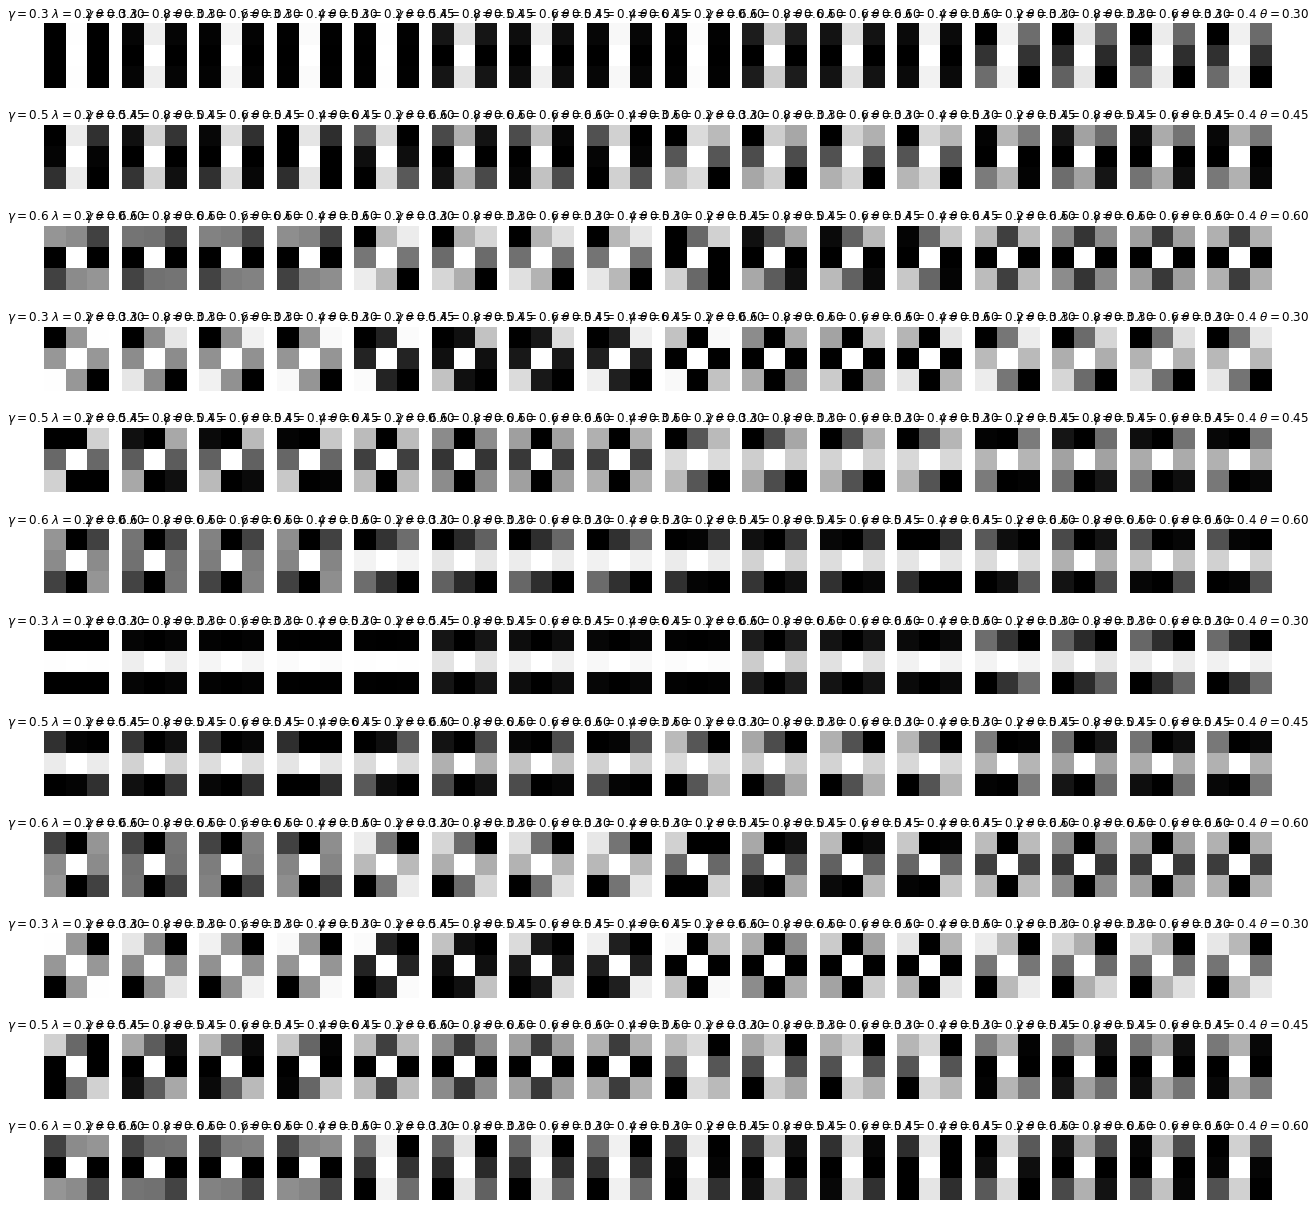

In [12]:
fig = plt.subplots(12, 16, figsize=(22,22))
filterbank = []
cnt = 0
for angle in np.linspace(0.0, 3.14159, 16, endpoint=False):
  for freq in [0.3, 0.45, 0.6]:
    for band in [0.2, 0.8, 0.6, 0.4]:
      print(freq, band, angle)
      cnt = cnt + 1
      gf = gabor_kernel(frequency=freq, bandwidth=band, theta=angle, n_stds=0).real
      plt.subplot(12, 16, cnt)
#       gf = resize(gk.real,(9,9),anti_aliasing=False)
#       gf = gf - np.min(gf)
#       gf = gf/np.max(gf)
#       gf = gf * 0.6
#       gf = gf - 0.3
      filterbank.append(gf)
      plt.imshow(gf, cmap='gray')
      print(gf.real.shape)
      # plt.colorbar()
      plt.axis('off')
      plt.title("$\\gamma=${0:0.1f} $\\lambda=${1:0.1f} $\\theta=${0:0.2f}".format(freq,band,angle))
plt.show()

In [13]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [21]:
# Importing the Keras libraries and packages
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adam

# dimensionality of input and latent encoded representations
inpt_dim = (32, 32, 3)

inpt_img = Input(shape=inpt_dim)

# Block 1
cl1 = Conv2D(64, (3, 3), strides=(2, 2),activation='relu', input_shape = inpt_dim)(inpt_img)
bnl2 = BatchNormalization()(cl1)
# afl3 = Activation('relu')(bnl2)
pl4 = MaxPooling2D(pool_size = (2, 2))(bnl2)

# Adding a second convolutional layer
cl5 = Conv2D(128, (3, 3), strides=(1, 1), activation='relu')(pl4)
bnl6 = BatchNormalization()(cl5)
# afl7 = Activation('relu')(bnl6)
pl8 = MaxPooling2D(pool_size = (2, 2))(bnl6)
bnl9 = BatchNormalization()(pl8)

# Step 3 - Flattening
fl10 = Flatten()(bnl9)

# Step 4 - Full connection
dol11 = Dropout(0.5)(fl10)
dl12 = Dense(units = 256, activation = 'relu')(dol11)
dol13 = Dropout(0.2)(dl12)
dl14 = Dense(units = 64, activation = 'relu')(dol13)
dol15 = Dropout(0.1)(dl14)
output = Dense(units = 10, activation = 'sigmoid')(dol15)

classifier = Model(inpt_img, output)

# Compiling the CNN
opt = RMSprop(learning_rate=0.001)
# opt = Adam(learning_rate=0.01)

classifier.compile(optimizer = opt, loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

print(classifier.summary())

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1792      
_________________________________________________________________
batch_normalization_3 (Batch (None, 15, 15, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
batch_normalization_4 (Batch (None, 5, 5, 128)         512       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)        

In [22]:
np.array(filterbank).shape

(192, 3, 3)

In [23]:
cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]   #get the filters
wshape = W.shape  #save the original shape

In [24]:
wshape

(3, 3, 3, 64)

In [25]:
gabor_filters = np.empty(wshape, dtype='float32')
for kernel_index in range(wshape[3]):
    for channel_index in range(3):
        gabor_filters[:,:,channel_index, kernel_index] = filterbank[kernel_index+channel_index]
# for k in range(0,wshape[3],3):
#   gabor_filters[:,:,0,k] = filterbank[k]
#   gabor_filters[:,:,1,k] = filterbank[k]
#   gabor_filters[:,:,2,k] = filterbank[k]


In [26]:
# Fitting the CNN to the images

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=35, 
                         restore_best_weights=True, verbose=1)

hist = classifier.fit(x_train, y_train, batch_size=100, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))

classifier.save_weights("cnn.hdf5")


Epoch 1/1000
500/500 [==============================] - 30s 60ms/step - loss: 0.2659 - accuracy: 0.3865 - val_loss: 0.3028 - val_accuracy: 0.2960
Epoch 2/1000
500/500 [==============================] - 35s 69ms/step - loss: 0.2181 - accuracy: 0.5122 - val_loss: 0.2351 - val_accuracy: 0.4702
Epoch 3/1000
500/500 [==============================] - 34s 69ms/step - loss: 0.2018 - accuracy: 0.5525 - val_loss: 0.1868 - val_accuracy: 0.5873
Epoch 4/1000
500/500 [==============================] - 34s 67ms/step - loss: 0.1911 - accuracy: 0.5794 - val_loss: 0.1867 - val_accuracy: 0.5927
Epoch 5/1000
500/500 [==============================] - 34s 67ms/step - loss: 0.1851 - accuracy: 0.5961 - val_loss: 0.1905 - val_accuracy: 0.5783
Epoch 6/1000
500/500 [==============================] - 35s 70ms/step - loss: 0.1789 - accuracy: 0.6150 - val_loss: 0.1982 - val_accuracy: 0.5455
Epoch 7/1000
500/500 [==============================] - 35s 70ms/step - loss: 0.1738 - accuracy: 0.6232 - val_loss: 0.2371 -

Epoch 57/1000
500/500 [==============================] - 35s 70ms/step - loss: 0.1072 - accuracy: 0.7843 - val_loss: 0.1264 - val_accuracy: 0.7389
Epoch 58/1000
500/500 [==============================] - 34s 67ms/step - loss: 0.1066 - accuracy: 0.7847 - val_loss: 0.1305 - val_accuracy: 0.7285
Epoch 59/1000
500/500 [==============================] - 33s 67ms/step - loss: 0.1060 - accuracy: 0.7854 - val_loss: 0.1327 - val_accuracy: 0.7237
Epoch 60/1000
500/500 [==============================] - 34s 68ms/step - loss: 0.1041 - accuracy: 0.7906 - val_loss: 0.1419 - val_accuracy: 0.7093
Epoch 61/1000
500/500 [==============================] - 35s 71ms/step - loss: 0.1042 - accuracy: 0.7910 - val_loss: 0.1310 - val_accuracy: 0.7312
Epoch 62/1000
500/500 [==============================] - 36s 73ms/step - loss: 0.1035 - accuracy: 0.7933 - val_loss: 0.1264 - val_accuracy: 0.7374
Epoch 63/1000
500/500 [==============================] - 37s 74ms/step - loss: 0.1038 - accuracy: 0.7930 - val_loss: 0

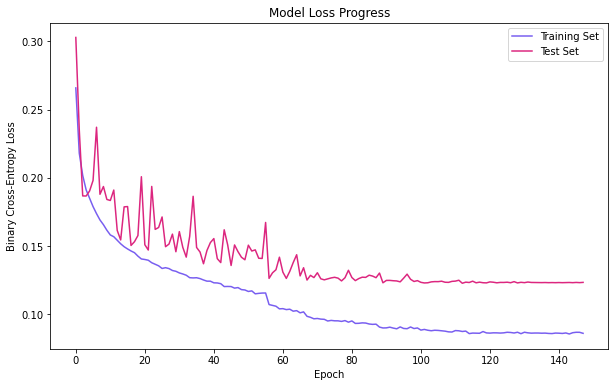

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Binary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('cnn-gabor.cifar10.loss-2.png', dpi=350, bbox_inches='tight')
plt.show()

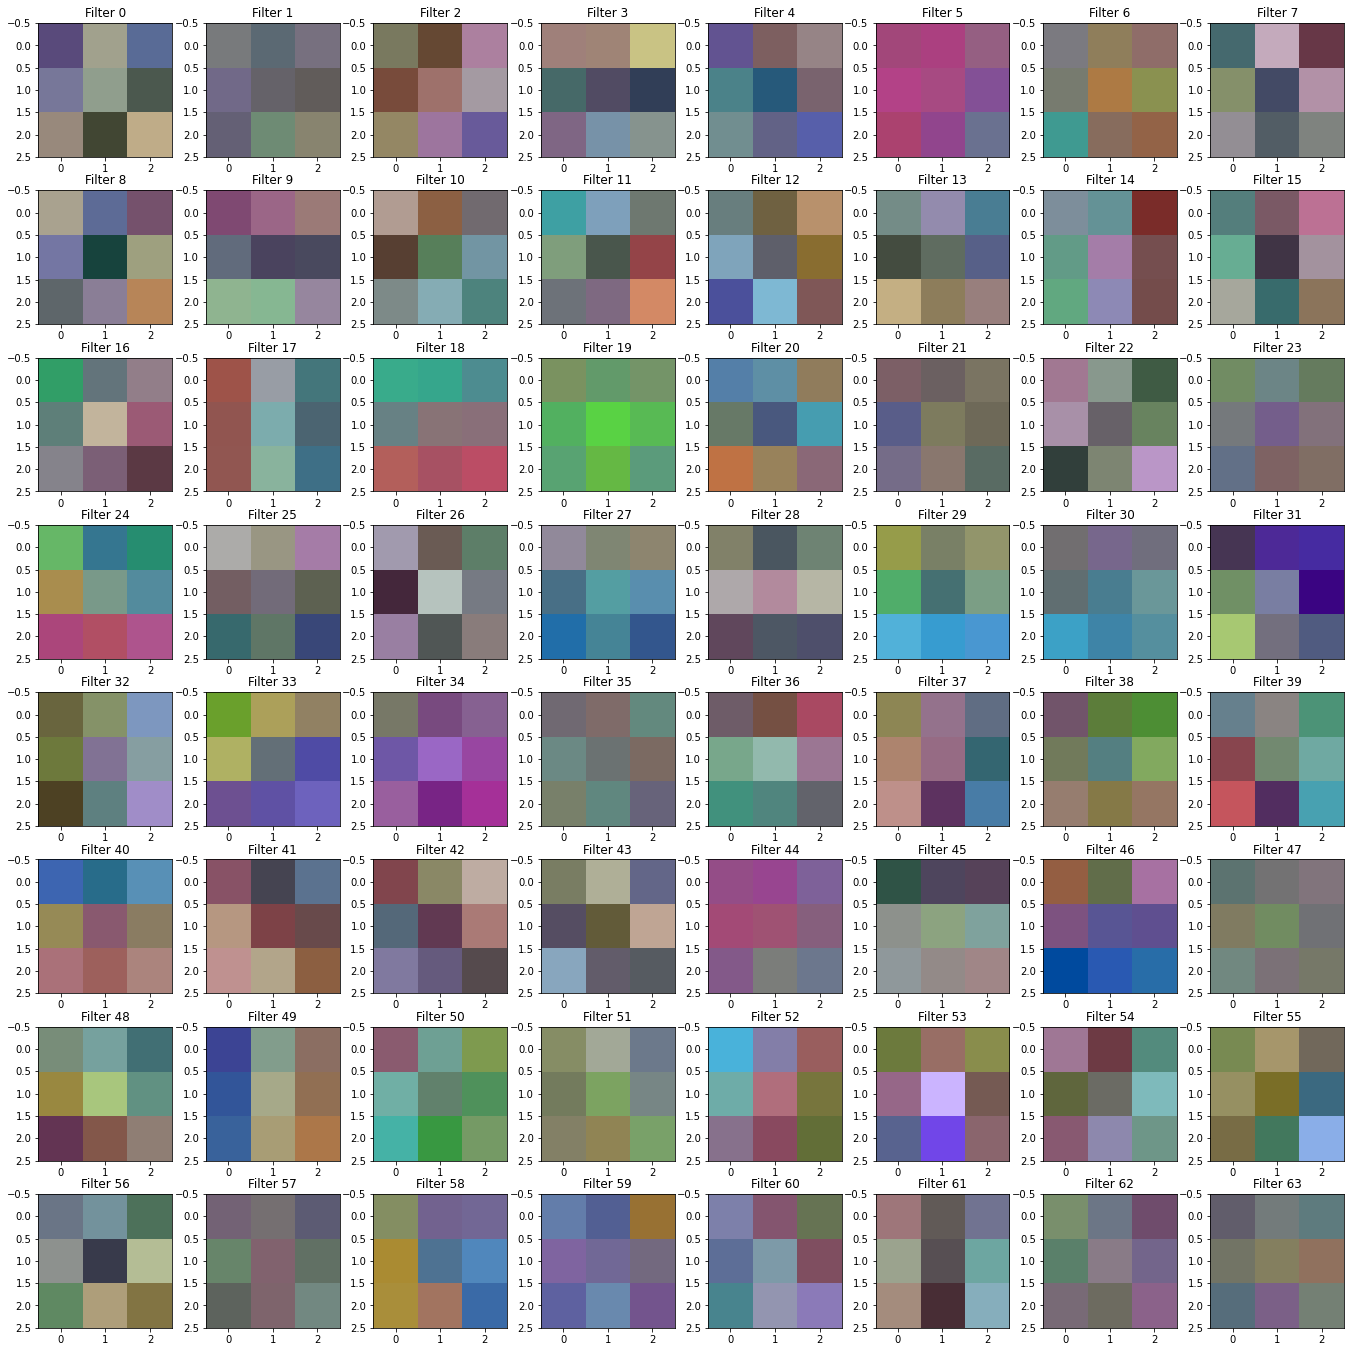

In [28]:
from sklearn.preprocessing import MinMaxScaler

cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]   #get the filters
wshape = W.shape  #save the original shape

# this part will scale to [0, 1] for visualization purposes
scaler = MinMaxScaler()
scaler.fit(W.reshape(-1,1))
W = scaler.transform(W.reshape(-1,1))
W = W.reshape(wshape)

# since there are 64 filters, we will display them 8x8
fig, axs = plt.subplots(8,8, figsize=(24,24))
fig.subplots_adjust(hspace = .25, wspace=.001)
axs = axs.ravel()
for i in range(W.shape[-1]):
  # we reshape to a 3D (RGB) image shape and display
  h = np.reshape(W[:,:,:,i], (3,3,3))
  axs[i].imshow(h)
  axs[i].set_title('Filter ' + str(i))    
plt.savefig("cnn-gabor.full.filters-2.png", bbox_inches='tight', dpi=350)

-0.48258683 0.5278916


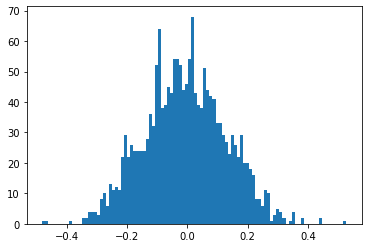

In [29]:
cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]
plt.hist(W.ravel(), bins=100)
print(np.min(W),np.max(W))